<a href="https://colab.research.google.com/github/mark-nick-o/AIML_SoundArtsProject/blob/main/youtube/gan/merry_gan_mas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/youtube/gan/merry_gan_mas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Merry GAN-mas
* Copyright 2020 [Jeff Heaton](https://www.heatonresearch.com/), [MIT License](https://opensource.org/licenses/MIT)

You can use this notebook to generate images useing a prebuilt GAN that I created. A GPU is required, this notebook is designed to work with Google CoLab. This notebook only deals with running the GAN to produce images.  To actually train the GAN, I used the following Docker image:

* [Heaton Research StyleGAN2 ADA Docker Image](https://hub.docker.com/r/heatonresearch/stylegan2-ada)
* [Collect Flickr Images](https://github.com/jeffheaton/pyimgdata)

To produce images, first, clone StyleGAN2 ADA from GitHub.

In [1]:
%tensorflow_version 1.x
!git clone https://github.com/NVlabs/stylegan2-ada.git

import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt

sys.path.insert(0, "/content/stylegan2-ada")

import dnnlib
import dnnlib.tflib as tflib

def seed2vec(Gs, seed):
  rnd = np.random.RandomState(seed)
  return rnd.randn(1, *Gs.input_shape[1:])

def init_random_state(Gs, seed):
  rnd = np.random.RandomState(seed) 
  noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]

def display_image(image):
    plt.imshow(image)
    plt.show()

def generate_image(Gs, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + Gs.input_shapes[1][1:])
    images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
    return images[0]

# PIL.Image.fromarray(images[0], 'RGB').save(f'{outdir}/seed{1}.png')

TensorFlow 1.x selected.
Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 74 (delta 0), reused 1 (delta 0), pack-reused 71
Unpacking objects: 100% (74/74), done.


No load the correct GAN, I have several links below that corrispond to both the NVIDIA faces GAN, as well as my own.

In [2]:
import IPython.display

URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
tflib.init_tf()
print('Loading networks from "%s"...' % URL)
with dnnlib.util.open_url(URL) as fp:
    _G, _D, Gs = pickle.load(fp)

Loading networks from "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/download/v1/christmas-gan-2020-12-03.pkl"...


# Generate GANS from Seeds

A GAN is actually created from a 512 number latent vector.  However, for now it is easier to just use seeds to build this 512 vector.  This code generates images between two seed numbers.

Seed 2222
Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


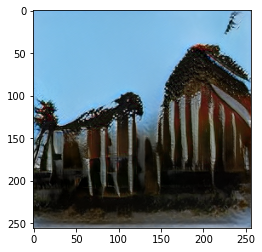

Seed 2223


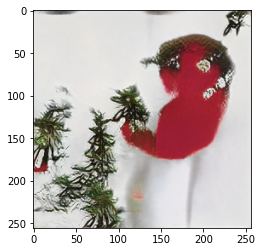

Seed 2224


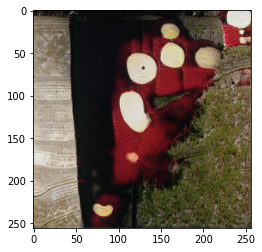

Seed 2225


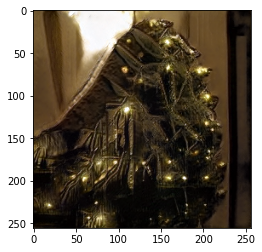

Seed 2226


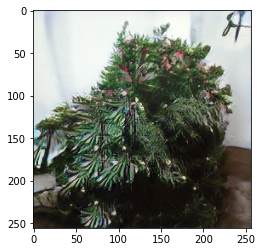

Seed 2227


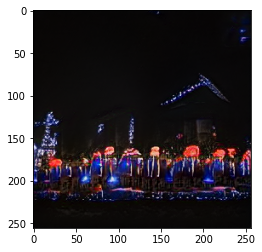

Seed 2228


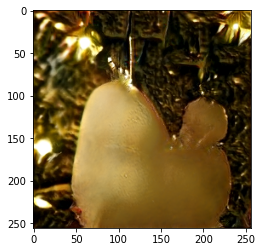

Seed 2229


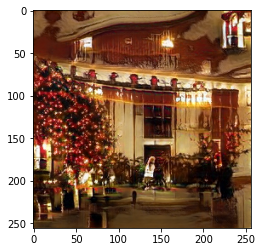

Seed 2230


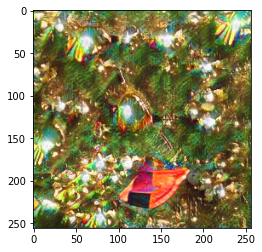

Seed 2231


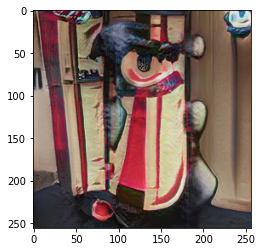

Seed 2232


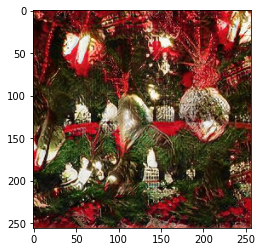

Seed 2233


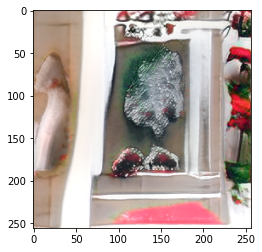

Seed 2234


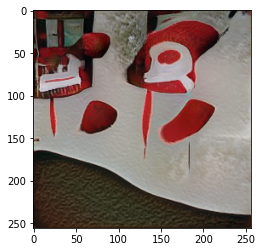

Seed 2235


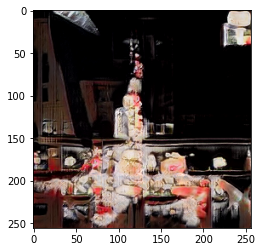

Seed 2236


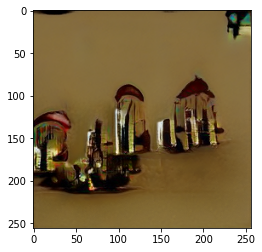

Seed 2237


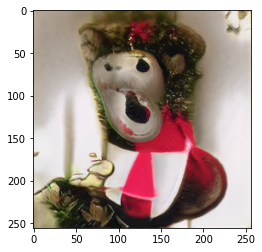

Seed 2238


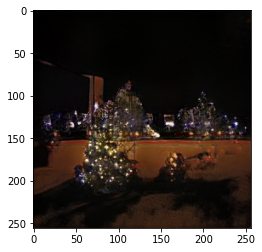

Seed 2239


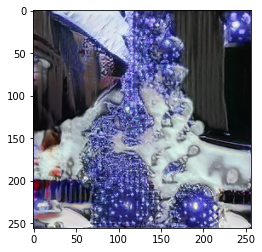

Seed 2240


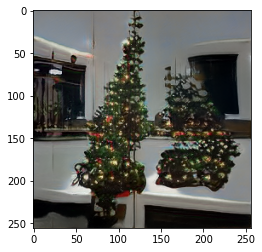

Seed 2241


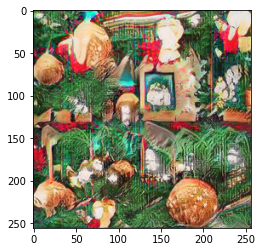

Seed 2242


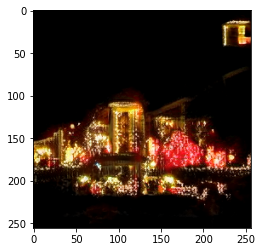

Seed 2243


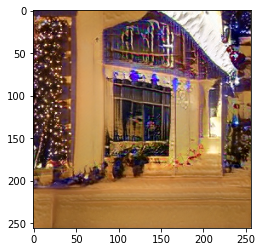

Seed 2244


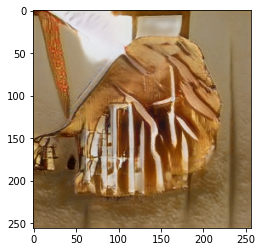

Seed 2245


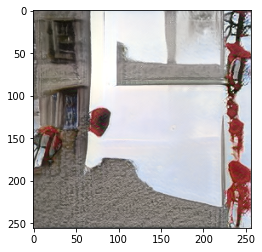

Seed 2246


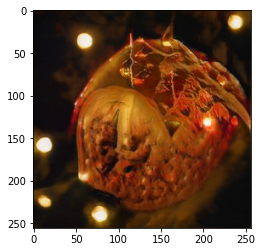

Seed 2247


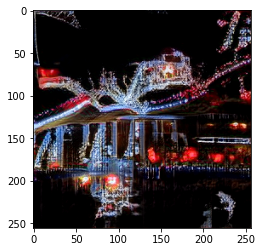

Seed 2248


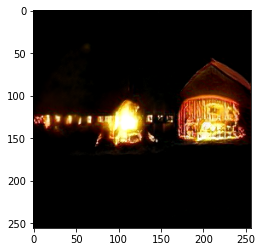

Seed 2249


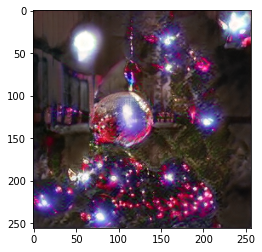

Seed 2250


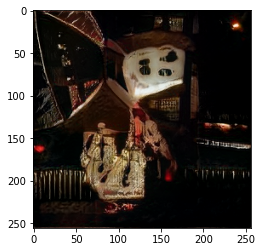

Seed 2251


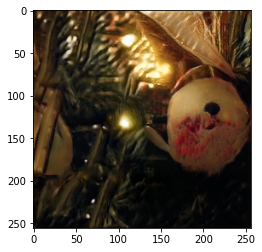

Seed 2252


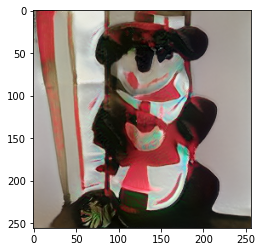

Seed 2253


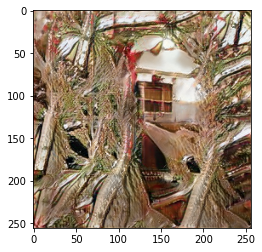

Seed 2254


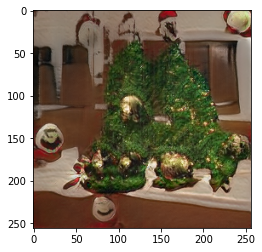

Seed 2255


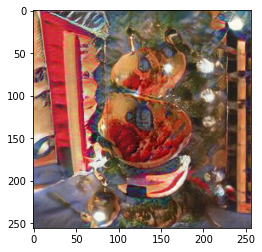

Seed 2256


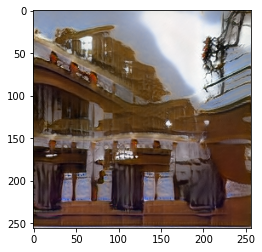

Seed 2257


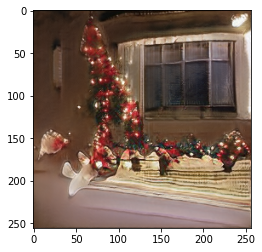

Seed 2258


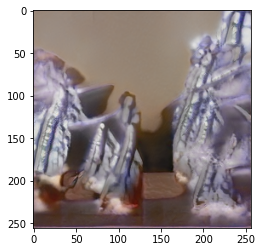

Seed 2259


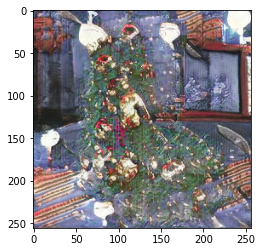

Seed 2260


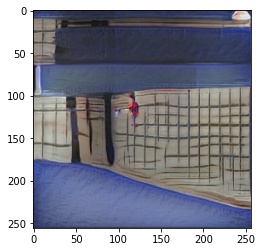

Seed 2261


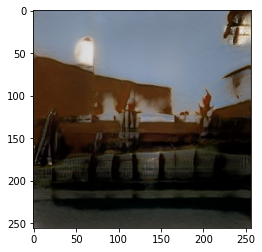

Seed 2262


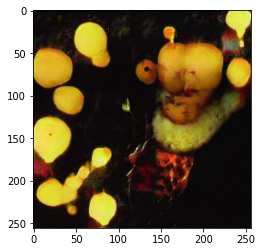

Seed 2263


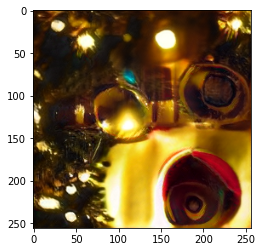

Seed 2264


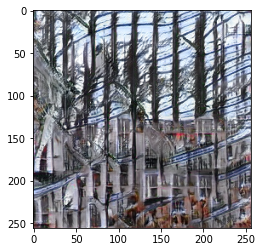

In [3]:
# Choose your own starting and ending seed.
SEED_FROM = 2222
SEED_TO = 2265

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  init_random_state(Gs, 10)
  z = seed2vec(Gs, i)
  img = generate_image(Gs, z, 1.0)
  display_image(img)

# Morph Video

You can create a video that shows the progression through two GAN seeds.  This technique creates a very cool "morph" effect. 

![GAN](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_progression.jpg "GAN")

# New section

In [6]:
# Choose your seeds to morph through and the number of steps to take to get to each.
# This has been modified to overlay the composite com,png 
# --------> you have to upload that first to the results folder

SEEDS = [2244,2264,2263,2262,2260,2236,2224]
STEPS = 100

# Remove any prior results
#!rm /content/results/* 

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(Gs, SEEDS[i])
  v2 = seed2vec(Gs, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    init_random_state(Gs, 10)
    img = generate_image(Gs, current, 1.0)
    PIL.Image.fromarray(img, 'RGB').save(f'./results/frame-{idx}.png')
    img1 = PIL.Image.open(f'./results/frame-{idx}.png')
    r, b, g = img1.split()
    a = PIL.Image.new("L", r.size, "white")
    img1 = PIL.Image.merge("RGBA", (r, b, g, a))
    # ====== img2 has alpha ======
    img2 = PIL.Image.open(f'./results/com.png')
    img2 = img2.resize(img1.size)
    PIL.Image.alpha_composite(img1, img2).save(f'./results/frame-{idx}NW.png')
    idx+=1
 
# Link the images into a video.
!ffmpeg -r 30 -i /content/results/frame-%dNW.png -vcodec mpeg4 -y movie.mp4

Seed 2244:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 2264:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 2263:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 2262:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 2260:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 2236:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

Download the video.

In [7]:
from google.colab import files
files.download('movie.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Choose your seeds to morph through and the number of steps to take to get to each.
# This works with the images in invert mode or modified by the functions defined 

import random

listOfModifiers = [ 200, 255, 100, 50 ]

def func2(p):
    return 255 - p

def func3(p):
    if p <= 100:
        return 100 - p
    else:
        return 255 - p

def func4(p):
    if p >= 100:
        return abs(50 - p)
    else:
        return 255 - p

def func5(p):
    if p >= 100:
        return abs(50 - p)
    elif p <= 100:
        return abs(255 - p)
    else:
        return abs(255 - (360 - p))

def func6(p):
    if p >= 150:
        return p
    elif p <= 90:
        return 255 - p
    else:
        return abs(255 - (360 - p))

def func7(p):
    if p >= 190:
        return 255 - p
    elif p <= 50:
        return p
    else:
        return abs(100 - p)

def func8(p):
    if p >= 160:
        return p
    elif p <= 100:
        return 255 - p
    else:
        return abs(60 - p)

# randomize function
#
def func9(p):
    if p >= 160:
        return abs (random.choice(listOfModifiers) - p)
    elif p <= 100:
        return abs (random.choice(listOfModifiers) - p)
    else:
        return abs (random.choice(listOfModifiers) - p)

SEEDS = [808,815,1065,1106,97,86,187,768]
STEPS = 100

# Remove any prior results
!rm /content/results/* 

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(Gs, SEEDS[i])
  v2 = seed2vec(Gs, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    init_random_state(Gs, 10)
    img = generate_image(Gs, current, 1.0)
    PIL.Image.fromarray(img, 'RGB').save(f'./results/frame-{idx}.png')
    img1 = PIL.Image.open(f'./results/frame-{idx}.png')
    # PIL.Image.eval(img1, func2).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func3).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func4).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func5).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func6).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func7).save(f'./results/frame-{idx}NX.png')
    #PIL.Image.eval(img1, func8).save(f'./results/frame-{idx}NX.png')
    PIL.Image.eval(img1, func9).save(f'./results/frame-{idx}NX.png')
    idx+=1
 
# Link the images into a video.
!ffmpeg -r 30 -i /content/results/frame-%dNX.png -vcodec mpeg4 -y movie.mp4

Seed 808:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 815:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1065:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1106:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 97:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 86:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 187:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [24]:
from google.colab import files
files.download('movie.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Finetune an Image

If you find a seed that you like, you can fine tune it by adjusting the latent vector directly.  First, choose the seed to finetune.

In [ ]:
START_SEED = 1049

current = seed2vec(Gs, START_SEED)

Next, generate display the current vector. You will return to this point for each iteration of the finetuning.

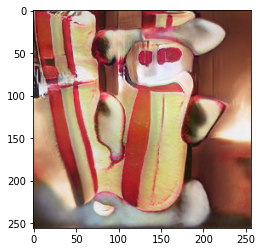

In [ ]:
init_random_state(Gs, 10)
img = generate_image(Gs, current, 1.0)
display_image(img)

Choose an explore size, this is the number of differnt potential images that will be chosen by moving in 10 different directions.  Run this code once initially, and then again anytime you wish to change the 10 directions you are exploring.  You might change the 10 directions if you are no longer seeing improvements.

In [ ]:
EXPLORE_SIZE = 10

explore = []
for i in range(EXPLORE_SIZE):
  explore.append( np.random.rand(1, 512) - 0.5 )

Direction 0


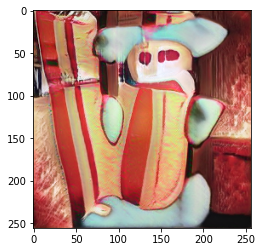

Direction 1


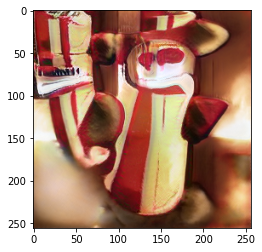

Direction 2


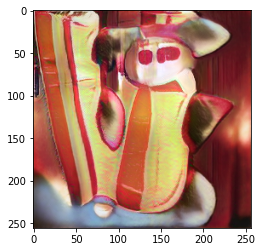

Direction 3


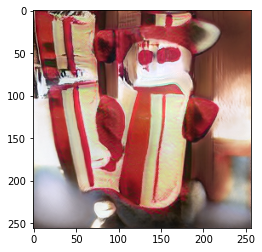

Direction 4


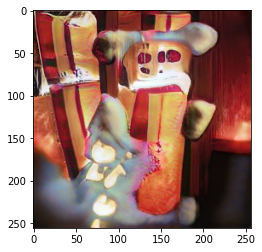

Direction 5


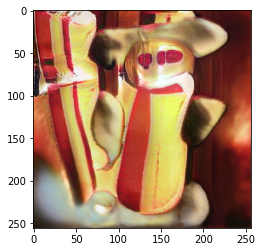

Direction 6


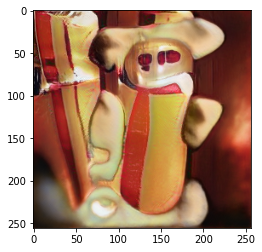

Direction 7


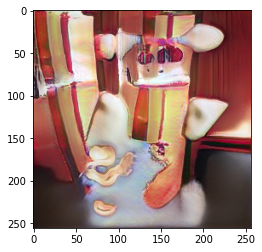

Direction 8


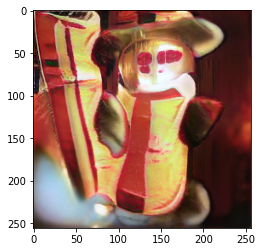

Direction 9


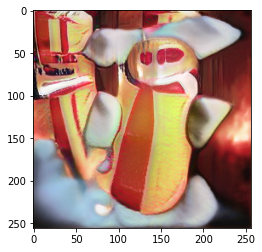

In [ ]:
# Choose the direction to move.  Choose -1 for the initial iteration.   
MOVE_DIRECTION = -1

if MOVE_DIRECTION >=0:
  current = current + explore[MOVE_DIRECTION]

for i, mv in enumerate(explore):
  print(f"Direction {i}")
  init_random_state(Gs, 10)
  z = current + mv
  img = generate_image(Gs, z, 1.0)
  display_image(img)